In [2]:
# 데이터 분석 관련 라이브러리
import pandas as pd  # 데이터 프레임 처리
import numpy as np  # 배열, 행렬 연산

# 시각화 관련 라이브러리
import matplotlib.pyplot as plt  # 기본적인 시각화
import seaborn as sns  # 고급 시각화
import matplotlib.font_manager as fm  # 폰트 설정
from matplotlib import rcParams  # 설정 관리

# 맥북에서 한글 설정 (matplotlib에서 한글 깨짐 방지)
plt.rcParams['font.family'] = 'AppleGothic'  # 맥북에서 기본 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 머신러닝 관련 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 분할
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 스케일러
from sklearn.linear_model import LinearRegression, LogisticRegression  # 선형 회귀, 로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # 결정 트리
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # 랜덤 포레스트
from sklearn.svm import SVC, SVR  # 서포트 벡터 머신
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report  # 성능 평가

# 통계 관련 라이브러리
import statsmodels.api as sm  # 통계 모델링
import scipy.stats as stats  # 통계 함수

# 기타 라이브러리
import os  # 운영체제 관련 기능
import sys  # 시스템 관련 기능
import re  # 정규 표현식
import json  # JSON 파일 처리
import datetime  # 날짜 및 시간 처리
import pickle  # 객체 직렬화 및 역직렬화
import requests  # HTTP 요청
import random  # 난수 생성
import math  # 수학 함수


### 데이터 불러오기 및 컬럼 맞추기

In [ ]:
성남시_df = pd.read_csv('../비교분석데이터/성남시_데이터.csv', encoding='utf-8')
군포_의왕_df = pd.read_csv('../비교분석데이터/군포의왕시_데이터.csv', encoding='utf-8')

In [5]:
pd.set_option('display.max_columns', None)
성남시_df

,시군명,센터명칭,보증금,월세,매매가,공급면적(평),전용면적(평),현재층,공실률(%),건축면적(㎡),연면적(㎡),평당 월 임대료,총층,공급종류,위도,경도,소재지도로명주소,용도지역,유치가능업체수,입주업체수,착공일자
0,성남시,SK V1,4000.0,130.0,3.500000e+12,77.098260,38.521041,9.301587,74.726610,140396.0,2.679558e+06,0.747126,20,매매,37.439507,127.173858,경기도 성남시 중원구 갈마치로288번길 14,일반공업,823.0,216.0,2016-09-01
1,성남시,SK엔테크노파크,8500.0,180.0,5.500000e+12,169.583688,101.624787,7.884615,47.263682,196562.0,2.910076e+06,0.658949,15,월세,37.439948,127.176987,경기도 성남시 중원구 사기막골로 124,일반공업,804.0,422.0,2004-12-07
2,성남시,SK지식산업센터,2000.0,200.0,NaN,90.951257,56.768911,1.000000,44.604317,45642.0,4.107780e+05,0.586510,9,월세,37.435632,127.174406,경기도 성남시 중원구 갈마치로 234,일반공업,139.0,81.0,1997-07-31
3,성남시,금강펜테리움IT타워,4000.0,180.0,5.600000e+12,94.115576,52.860262,9.415094,75.000000,99283.0,1.413429e+06,0.664336,15,월세,37.433385,127.173399,경기도 성남시 중원구 갈마치로 215,일반공업,448.0,112.0,2006-05-15
4,성남시,금강하이테크밸리,3500.0,120.0,2.650000e+12,71.501715,45.027483,6.720000,61.081081,40208.0,4.199502e+05,0.575916,10,월세,37.444431,127.178099,경기도 성남시 중원구 사기막골로 177,일반공업,185.0,72.0,2001-12-28
5,성남시,드림테크노,1500.0,100.0,3.000000e+08,56.693287,31.863190,5.000000,67.469880,16461.0,1.646100e+05,0.540541,10,월세,37.431703,127.168252,경기도 성남시 중원구 둔촌대로 464,일반공업,83.0,28.0,2007-04-06
6,성남시,반포테크노피아,3000.0,130.0,2.500000e+12,74.953902,41.310792,5.950000,67.368421,20383.0,1.843332e+05,0.603448,9,월세,37.430378,127.174485,경기도 성남시 중원구 갈마치로 186,일반공업,95.0,32.0,2008-07-10
7,성남시,벽산테크노피아,9000.0,250.0,7.700000e+12,155.361860,101.531507,5.051282,46.666667,29866.0,2.751939e+05,0.635294,9,월세,37.431191,127.178641,경기도 성남시 중원구 둔촌대로 560,일반공업,105.0,56.0,2001-05-19
8,성남시,선일테크노피아,1000.0,110.0,NaN,40.534818,24.804888,5.000000,36.690647,43406.0,5.208720e+05,0.820896,12,월세,37.432074,127.178468,경기도 성남시 중원구 둔촌대로 555,일반공업,139.0,89.0,2002-01-21
9,성남시,성남 센터엠,4000.0,110.0,4.800000e+12,53.313842,27.329826,6.456522,73.116438,70980.0,1.074840e+06,0.822891,15,월세,37.435211,127.175143,경기도 성남시 중원구 사기막골로62번길 33,일반공업,584.0,158.0,2019-07-11


In [6]:
성남시_df.columns

Index(['시군명', '센터명칭', '보증금', '월세', '매매가', '공급면적(평)', '전용면적(평)', '현재층',
       '공실률(%)', '건축면적(㎡)', '연면적(㎡)', '평당 월 임대료', '총층', '공급종류', '위도', '경도',
       '소재지도로명주소', '용도지역', '유치가능업체수', '입주업체수', '착공일자'],
      dtype='object')

In [7]:
군포_의왕_df.columns

Index(['시군명', '센터명칭', '보증금', '월세', '매매가', '공급면적(평)', '전용면적(평)', '현재층', '공실률',
       '건축면적(㎡)', '연면적(㎡)', '평당 월 임대료', '총층', '공급종류', '위도', '경도', '소재지도로명주소',
       '용도지역', '부지면적(㎡)', '공장시설면적(㎡)', '지원시설면적(㎡)', '유치가능업체수', '입주업체수', '공장동수',
       '분양형태', '공사진행상황', '허가일자', '착공일자', '준공일자', '사용승인일', '데이터기준일자'],
      dtype='object')

In [8]:
# 군포_의왕_df에는 있지만 성남시_df에는 없는 컬럼들
extra_columns_in_gunpo_uiwang = ['부지면적(㎡)', '공장시설면적(㎡)', '지원시설면적(㎡)', '공장동수',
                                 '분양형태', '공사진행상황', '허가일자', '준공일자', '사용승인일', '데이터기준일자']

# 성남시_df에는 있지만 군포_의왕_df에는 있는 컬럼 이름 맞춰주기
rename_columns = {'공실률(%)': '공실률'}

# 성남시_df 컬럼명 변경
성남시_df = 성남시_df.rename(columns=rename_columns)

# 군포_의왕_df에서 성남시_df에 없는 컬럼 제거 (추가된 컬럼들을 삭제)
군포_의왕_df = 군포_의왕_df.drop(columns=extra_columns_in_gunpo_uiwang, errors='ignore')

# 컬럼 정렬 (두 데이터프레임의 컬럼을 동일한 순서로 배치)
성남시_df = 성남시_df[군포_의왕_df.columns]

# 최종 컬럼 확인 (동일한지 체크)
assert list(성남시_df.columns) == list(군포_의왕_df.columns), "컬럼 정렬 불일치 발생!"


In [9]:
print(성남시_df.columns)
print(군포_의왕_df.columns)

Index(['시군명', '센터명칭', '보증금', '월세', '매매가', '공급면적(평)', '전용면적(평)', '현재층', '공실률',
       '건축면적(㎡)', '연면적(㎡)', '평당 월 임대료', '총층', '공급종류', '위도', '경도', '소재지도로명주소',
       '용도지역', '유치가능업체수', '입주업체수', '착공일자'],
      dtype='object')
Index(['시군명', '센터명칭', '보증금', '월세', '매매가', '공급면적(평)', '전용면적(평)', '현재층', '공실률',
       '건축면적(㎡)', '연면적(㎡)', '평당 월 임대료', '총층', '공급종류', '위도', '경도', '소재지도로명주소',
       '용도지역', '유치가능업체수', '입주업체수', '착공일자'],
      dtype='object')


In [10]:
군포_의왕_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군명       16 non-null     object 
 1   센터명칭      16 non-null     object 
 2   보증금       14 non-null     float64
 3   월세        14 non-null     float64
 4   매매가       15 non-null     float64
 5   공급면적(평)   16 non-null     float64
 6   전용면적(평)   16 non-null     float64
 7   현재층       16 non-null     float64
 8   공실률       16 non-null     float64
 9   건축면적(㎡)   16 non-null     float64
 10  연면적(㎡)    16 non-null     float64
 11  평당 월 임대료  14 non-null     float64
 12  총층        16 non-null     int64  
 13  공급종류      16 non-null     object 
 14  위도        16 non-null     float64
 15  경도        16 non-null     float64
 16  소재지도로명주소  16 non-null     object 
 17  용도지역      16 non-null     object 
 18  유치가능업체수   16 non-null     float64
 19  입주업체수     16 non-null     float64
 20  착공일자      16 non-null     object 


In [11]:
# 만약 '착공일자'가 object 타입이면 연도로 변환할 수 있도록 처리
# 예시: 착공일자를 datetime으로 변환
성남시_df['착공일자'] = pd.to_datetime(성남시_df['착공일자'], errors='coerce')
군포_의왕_df['착공일자'] = pd.to_datetime(군포_의왕_df['착공일자'], errors='coerce')

# 건축연도(또는 준공연도) 컬럼을 추가
성남시_df['건축연도'] = 성남시_df['착공일자'].dt.year
군포_의왕_df['건축연도'] = 군포_의왕_df['착공일자'].dt.year

### 건물정보에 대한 기초통계량 해석

In [12]:
# 관심있는 컬럼들에 대한 요약통계 (예: 공급면적, 전용면적, 연면적, 공실률 등)
cols_to_describe = ['공급면적(평)', '전용면적(평)', '연면적(㎡)', '공실률', '건축연도']

print("[성남시_df 기본 통계]")
display(성남시_df[cols_to_describe].describe())

print("[군포_의왕_df 기본 통계]")
display(군포_의왕_df[cols_to_describe].describe())

[성남시_df 기본 통계]


,공급면적(평),전용면적(평),연면적(㎡),공실률,건축연도
count,21.000000,21.000000,2.100000e+01,21.000000,21.000000
mean,101.950549,59.523594,9.377845e+05,56.548185,2005.904762
std,42.560574,27.207459,8.329317e+05,14.155065,6.355350
min,40.534818,24.804888,1.646100e+05,18.072289,1997.000000
25%,71.501715,38.521041,3.215608e+05,47.263682,2001.000000
50%,90.951257,54.569162,5.208720e+05,60.000000,2006.000000
75%,130.968161,82.128380,1.413429e+06,67.368421,2008.000000
max,174.662714,106.298022,2.910076e+06,75.000000,2020.000000


[군포_의왕_df 기본 통계]


,공급면적(평),전용면적(평),연면적(㎡),공실률,건축연도
count,16.000000,16.000000,1.600000e+01,16.000000,16.000000
mean,144.297682,70.144672,5.950329e+05,18.002905,2005.312500
std,126.283982,38.167815,1.102851e+06,21.021934,9.700301
min,53.052003,26.327813,2.086700e+04,0.000000,1991.000000
25%,79.979953,40.216850,7.986631e+04,0.600962,1998.250000
50%,101.437877,62.492404,3.358681e+05,11.764706,2002.500000
75%,149.459536,86.225380,5.286756e+05,27.287876,2016.000000
max,581.808866,143.048245,4.612406e+06,64.705882,2020.000000


- 공급면적과 전용면적 비교 분석
```
군포·의왕 지역의 평균 공급면적이 성남시보다 더 크며, **표준편차(±126.28)**도 매우 커서, 공급면적의 편차가 큰(소형부터 초대형까지 다양하게 존재하는) 센터들이 있음을 유추할 수 있습니다.
성남시는 최소값이 40평대부터 최대 170평대 정도로, 전반적으로 규모 면에서 상대적으로 중소형~중형 정도가 많이 분포하는 것으로 보입니다.
```
- 연면적(㎡) 비교분석
```
성남시
연면적 평균 ≈ 937,784㎡ (약 93.8만 ㎡)
표준편차 ≈ 832,931㎡
최소값 = 164,610㎡ / 최대값 = 2,910,076㎡ (약 291만 ㎡)
군포·의왕시
연면적 평균 ≈ 595,033㎡ (약 59.5만 ㎡)
표준편차 ≈ 1,102,851㎡
최소값 = 20,867㎡ / 최대값 = 4,612,406㎡ (약 461만 ㎡)
해석

연면적은 성남시가 평균적으로 더 크지만, 군포·의왕시에서 **최대값(461만 ㎡)**이 성남시 최대값(291만 ㎡)보다 훨씬 큼에 주목할 필요가 있습니다.
이는 군포·의왕 지역 내에 단일 대규모(超대형) 센터가 존재하거나, 특정 센터가 여러 동(棟)을 합쳐 매우 큰 규모를 가지고 있을 가능성을 시사합니다.
전체적으로 볼 때, 군포·의왕도 매우 큰 편차(표준편차 110만 ㎡)가 존재하므로, 연면적이 아주 작은 소규모 센터부터 초대형 센터까지 스펙트럼이 넓은 편입니다.
```

- 공실률 비교분석
```
성남시
공실률 평균 ≈ 56.55% (표준편차 14.16)
최소값 = 18.07% / 최대값 = 75.00%
군포·의왕시
공실률 평균 ≈ 18.00% (표준편차 21.02)
최소값 = 0.00% / 최대값 = 64.71%
해석

두 지역에서 가장 두드러진 차이점은 평균 공실률입니다.
성남시는 평균 공실률이 **56%**로 매우 높고, 대부분의 센터들이 50% 전후에서 70% 이상까지 분포하고 있습니다(최소값도 18%로 비교적 높음).
군포·의왕시는 평균 공실률이 **18%**로, 어떤 센터는 0%(만실) 상태인 곳도 있고, 최대값은 64.7%로 일부 센터는 공실이 많지만, 전체적으로는 낮은 공실률을 유지하는 편입니다.
이는 성남시가 공실률 측면에서 군포·의왕시보다 훨씬 불리한 상황임을 분명히 보여줍니다.
추가 해석 가정:

성남시는 산업 입지가 많고 경쟁이 치열하거나, 또는 임대료가 높아 실제 입주가 어렵다는 가정도 해볼 수 있습니다.
군포·의왕시는 일부 초대형 센터를 제외하면 대체로 공실이 낮은 편이라, 임대료 수준이나 입지 장점 등 여러 요인이 작용했을 가능성이 있습니다.
```
- 건축연도 비교분석 
```
성남시
평균 건축연도 ≈ 2005.90년 (표준편차 6.36)
범위: 1997 ~ 2020년
군포·의왕시
평균 건축연도 ≈ 2005.31년 (표준편차 9.70)
범위: 1991 ~ 2020년
해석

두 지역 모두 대체로 2000년대 중반에 건축된 센터가 많음을 알 수 있습니다(평균 건축연도가 2005년대).
군포·의왕시는 1991년 건축된 오래된 센터부터 2020년에 준공한 신축까지 분포 폭이 더 넓습니다(표준편차가 큼).
성남시도 최저 1997년, 최고 2020년으로 90년대 중후반부터 2020년대까지 분포하고 있습니다.
건물 노후도만 놓고 보면 두 지역이 크게 차이가 나지는 않으나, 성남시는 매우 오래된(90년대 초중반) 센터는 없고 주로 2000년 이후에 지어진 것으로 보입니다.
그러나 공실률이 높은 원인을 단순히 “노후도”로만 설명하기 어렵고, 임대료 수준, 면적구성(대형 vs 소형), 업종 특성 등 다른 요인이 더 크게 작용했을 가능성이 큽니다.
```

- 종합
```
성남시가 평균 연면적은 더 큰 편이나, 공급면적(호실 단위)은 상대적으로 100평 안팎이 많은 편입니다. 군포·의왕시는 평균 공급면적이 144평으로 더 크고, 500평 이상 초대형 호실도 존재하는 등 스펙트럼이 넓습니다.

가장 눈에 띄는 지표는 공실률로, 성남시(평균 56.55%)와 군포·의왕시(평균 18.00%) 사이에 큰 차이가 존재합니다.
성남시는 전체적으로 공실률이 높게 형성되어 있으며, 최저값(18%)조차도 군포·의왕시 평균(18%)과 유사하거나 그보다 높습니다. 이는 성남시 내 지식산업센터들이 입주율을 올리는 데 어려움을 겪고 있음을 보여줍니다.

두 지역 모두 90년대 후반 ~ 2020년 사이에 고르게 분포되지만, 군포·의왕시는 1990년대 초중반 건축된 상당히 오래된 센터도 있다는 점이 특징입니다.
하지만 “노후 센터 = 공실률 높음”이라는 단순 공식이 성남시에는 적용되지 않는 것으로 보이는데, 이는 성남시의 공실 문제가 노후도 이외에 임대료, 업종규제, 지가 상승, 경쟁 공급 과잉 등이 복합적으로 작용했을 가능성을 시사합니다.

추가적으로 
임대료(보증금, 월세, 평당 월 임대료), 입지(주변 교통, 산업단지 연계성), 유치가능업체수 vs 입주업체수 등의 데이터를 함께 보면, 왜 성남시가 이렇게 공실률이 높은지를 더 구체적으로 분석할 수 있을 것입니다.
군포·의왕시의 경우, 저렴한 임대료 정책 또는 중소기업 특화 지원책 등으로 인해 입주가 활발했을 수도 있고, 확실한 산업 클러스터가 형성되어 공실률이 낮게 유지되는 일부 케이스가 있을 수 있습니다.

```


결론

```
성남시: 평균적으로 상당히 **높은 공실률(56%)**을 보이는 것이 가장 큰 특징이며, 면적은 중간 정도 규모(100평 전후)가 주를 이루고, 건축연도는 2000년대 중반~후반이 많습니다. 단순 ‘노후’ 문제라기보다는 높은 임대료, 입지 경쟁, 수요 대비 공급과잉 등이 복합 작용했을 가능성이 높습니다.

군포·의왕시: 평균 공실률이 18%로 상대적으로 낮고, 일부 센터는 공실이 거의 없는(0%) 상태도 있습니다. 대신 공급면적과 연면적의 편차가 커서, 초대형 센터가 포함되어 있음을 유추할 수 있습니다. 건축 시기도 1990년대부터 2020년까지 넓게 분포합니다. 어느 정도 안정적인 임대 시장을 형성 중이거나, 특정 산업 클러스터가 활성화된 결과일 수 있습니다.
```
```
 큰 틀에서 **“성남시 = 높은 공실률, 대체로 중간 규모 센터” vs. “군포·의왕시 = 낮은 공실률, 소형~초대형까지 다양”**이라는 차이점을 파악할 수 있으며, 여기에 임대료, 산업입지 여건, 정책 지원 등을 결합해 추가 분석하면 더 구체적인 인사이트를 도출
```

--- 


### 건축연도 - 노후도와 공실률 간 관계 상관분석

/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_36372/1044290546.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_36372/1044290546.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


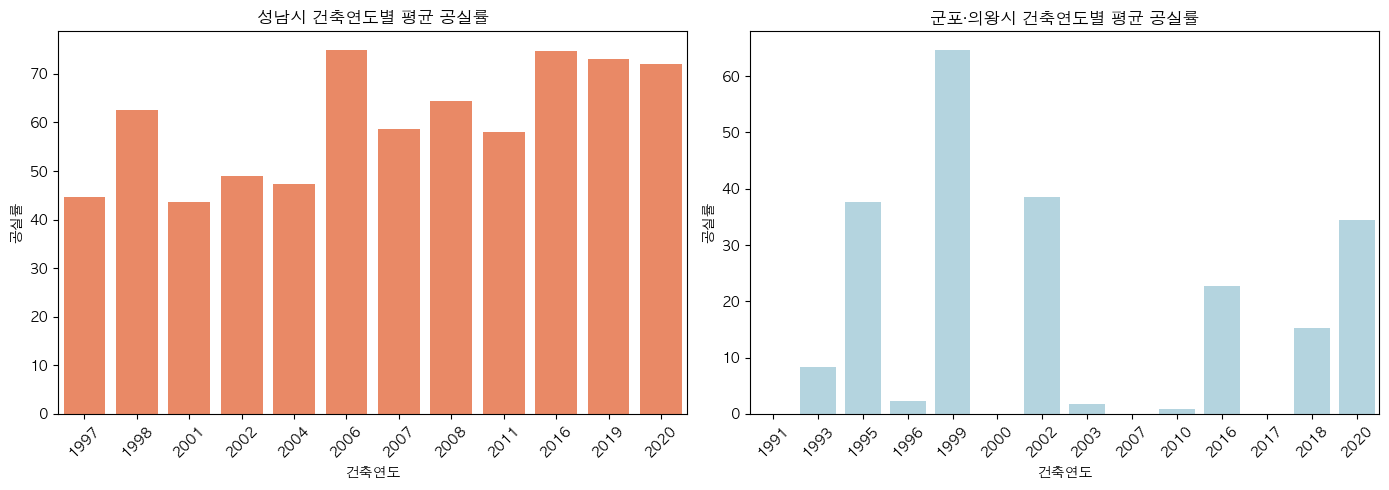

In [13]:
# 건축연도별 평균 공실률
sn_grouped = 성남시_df.groupby('건축연도')['공실률'].mean().reset_index()
go_grouped = 군포_의왕_df.groupby('건축연도')['공실률'].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x='건축연도', y='공실률', data=sn_grouped, ax=ax[0], color='coral')
ax[0].set_title('성남시 건축연도별 평균 공실률')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(x='건축연도', y='공실률', data=go_grouped, ax=ax[1], color='lightblue')
ax[1].set_title('군포·의왕시 건축연도별 평균 공실률')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

분석해석
```
전반적인 상관은 신축일수록 공실이 낮다. 노후일수록 공실이 높다가 뚜렷하지 않는다.

그래프(연도별 공실률 막대)와 실제 상관계수를 보면, 일관된 선형관계가 나타나지 않습니다. 성남시의 경우 2006·2019년 등 비교적 최근에 지어진 건물이 오히려 공실률이 매우 높게 나타나기도 하고, 군포·의왕시에서는 1999년(상당히 오래된 편)에 준공된 센터의 공실률이 매우 높은 반면, 1991년에 지어진 건물은 오히려 낮은 공실률을 보이는 식입니다.

이는 “노후도”만으로 공실률을 단정 짓기 어렵고, 임대료 수준, 입지(교통·산업 클러스터와의 근접성), 층·면적·편의시설 등 다른 요소가 공실률에 더 큰 영향을 주고 있음을 시사합니다.
```
```
년도별 표본의 수가 다르기때문에 예를 들어 1999년에 준공된 센터가 적으면 그 센터 중 하나의 공실률이 높으면 그 년도의 공실률이 높게 보인다.
또 성남시 2006년도 몇개 안되는데 센터 공실률이 70%가 넘는다고 생각하면 사실 년도별로 비교하기에는 표본의 수가 작다.

서로 30개 , 20개 이렇게 있다보니까...
또한 복합적인 원인을 보아야될것같다.
애초에 한도시안에서의 적은 모수라도 워낙 데이터 원래 적은거기에 지식산업센터의 전체 경향에 대한 일반화는 할수없지만 비교분석정도는 가능할것이다.


--- 

### 특정컬럼에 대한 상관관계분석

[성남시_df 상관계수]


,공실률,공급면적(평),전용면적(평),연면적(㎡),건축연도
공실률,1.000000,-0.371520,-0.470069,0.263025,0.622877
공급면적(평),-0.371520,1.000000,0.979778,-0.075542,-0.419389
전용면적(평),-0.470069,0.979778,1.000000,-0.146106,-0.533672
연면적(㎡),0.263025,-0.075542,-0.146106,1.000000,0.457769
건축연도,0.622877,-0.419389,-0.533672,0.457769,1.000000


[군포·의왕시_df 상관계수]


,공실률,공급면적(평),전용면적(평),연면적(㎡),건축연도
공실률,1.000000,0.063511,0.136873,-0.187810,0.002784
공급면적(평),0.063511,1.000000,0.105760,-0.117312,0.168115
전용면적(평),0.136873,0.105760,1.000000,-0.342134,-0.478124
연면적(㎡),-0.187810,-0.117312,-0.342134,1.000000,0.290596
건축연도,0.002784,0.168115,-0.478124,0.290596,1.000000


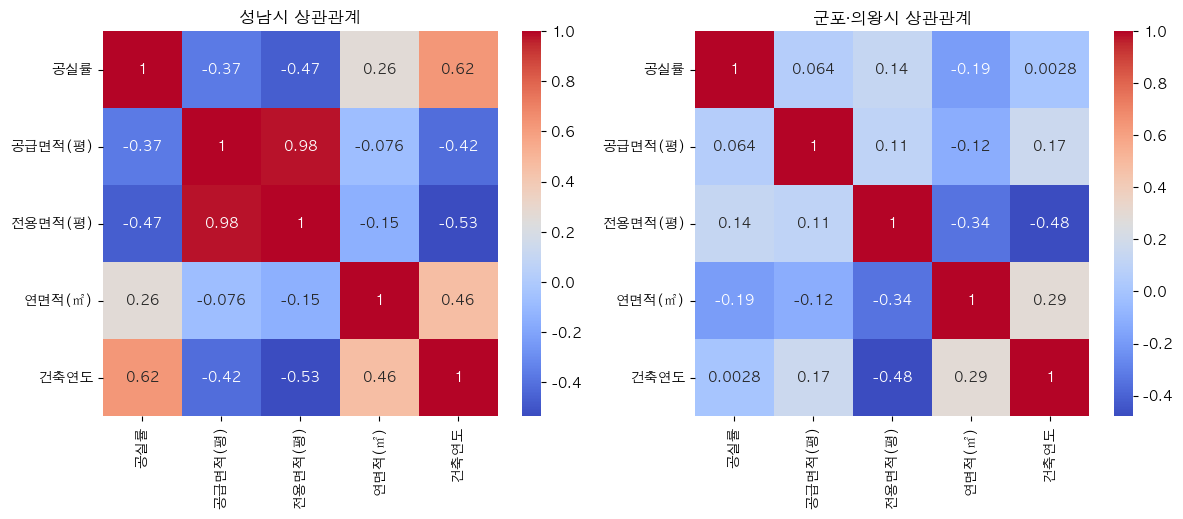

In [14]:
# 상관분석할 컬럼 지정
cols_for_corr = ['공실률', '공급면적(평)', '전용면적(평)', '연면적(㎡)', '건축연도']

print("[성남시_df 상관계수]")
corr_sn = 성남시_df[cols_for_corr].corr()
display(corr_sn)

print("[군포·의왕시_df 상관계수]")
corr_go = 군포_의왕_df[cols_for_corr].corr()
display(corr_go)

# 히트맵 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(corr_sn, annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title('성남시 상관관계')

sns.heatmap(corr_go, annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('군포·의왕시 상관관계')

plt.show()


#### 해석
- 성남시
```
공실률 vs. 전용면적(평) (상관계수 ≈ -0.470)

음의 상관: 전용면적이 클수록 공실률이 낮아지는 경향, 또는 전용면적이 작을수록 공실률이 높은 경향을 시사.
즉, 성남시 데이터에서는 대형 호실이 오히려 더 잘 임대된다는 해석이 가능함(물론 다른 변수 고려 필요).
공실률 vs. 공급면적(평) (상관계수 ≈ -0.372)

전용면적의 경우와 유사하게, 공급면적(평)이 증가할수록(대형 면적) 공실률이 낮게 형성되는 편.
전용면적과 공급면적이 매우 높은 상관(≈0.98)을 보이므로, 두 변수 모두 “규모가 큰 호실 = 공실이 조금 더 적다”는 흐름이 비슷하게 나타남.
공실률 vs. 연면적(㎡) (상관계수 ≈ +0.263)

양의 상관: 건물 전체 연면적이 큰 곳일수록 공실률이 다소 높게 나타나는 경향(약한 수준).
하지만 절대값이 0.3 미만이므로, 크게 두드러진 상관은 아님.
공실률 vs. 건축연도 (상관계수 ≈ +0.623)

상대적으로 강한 양의 상관: 준공연도가 최근(숫자가 클수록)일수록 공실률이 높게 형성됨.
일반적으로 “신축이면 공실률이 낮을 것”이라고 생각하기 쉬운데, 여기서는 반대로 새로 지어진 건물이 오히려 공실이 많이 남아있다는 것을 시사함.
예) 공급과잉, 높은 임대료, 입지적 한계 등으로 인해 신축센터가 아직 분양·임대가 덜 이루어졌을 수 있음.
반대로 오래된 센터가 이미 임차인이 안정적으로 들어와 있는 경우도 있음.
```

- 결론
```
성남시의 경우, 호실이 클수록 공실률이 낮고, 최근에 지어진 센터일수록 공실률이 높다는 흐름이 상관관계로 나타남.
이는 “새로 공급된 대형 센터”가 아닌 새로 공급된 소형 또는 중소형 위주 센터가 시장에서 상대적으로 공실이 많은 상태”일 가능성도 시사.
건축연도(노후도)만 놓고 보면 “오래된 건물이 공실이 많을 것”이라는 직관과는 다른 결과로, 신축이 과잉 공급되었거나 임대료가 비싸 실제 입주가 덜 된 상황인지 확인이 필요.
```


- 의왕시
```
전용면적(평) vs. 건축연도 (상관계수 ≈ -0.478)
군포·의왕시 데이터 내에서는, 건축연도가 최근일수록(숫자 클수록) 전용면적이 작은 편이거나, 오래된 건물이 전용면적이 큰 편일 가능성을 시사.
하지만 이 부분도 주된 관심사는 “공실률”이므로 참고만 할 수 있습니다.
```
- 결론
```
군포·의왕시에서는 공실률과 건축연도, 면적 등의 상관이 전반적으로 낮거나 거의 없는 편임.
이는 “소형·대형 여부나 건물 노후도가 공실률을 결정짓는 핵심 요인이 아니다”라는 의미.
대신 교통 접근성, 임대료·관리비, 산업 클러스터 형성, 지역정책 지원 등 데이터에 포함되지 않은 다른 요인이 공실률에 더 큰 영향을 미칠 것으로 추정할 수 있음.
```
- 종합적 결론
```
성남시

“전용면적(평)이 큰 센터 → 공실률 낮음” (음의 상관)
“건축연도가 최근일수록 → 공실률 높음” (양의 상관, 꽤 강함)
직관과는 반대되는 건축연도-공실률 관계가 눈에 띄므로, 신규 공급 과잉 혹은 높은 임대료 등의 시장 요인을 더 살펴볼 필요가 있음.
군포·의왕시

공실률과 면적·건축연도 간 뚜렷한 상관관계가 거의 없음.
이는 “노후도가 낮아서(혹은 높아서) 공실이 많은/적은” 식의 단순 설명이 힘들며, 다른 요인들이 공실률을 결정할 가능성이 큼.
예: 특정 산업단지·교통호재 등 입지적 장점이 잘 갖춰진 건물은 노후되었더라도 공실이 낮을 수 있음.
추가 분석 제안

임대료(월세, 평당 임대료), 보증금, 교통 접근성(역, IC 등 거리), 주변 산업 클러스터, 층수·편의시설 여부 등을 포함하는 회귀분석이나 트리모델을 시도해볼 수 있음.
또는 상관관계가 잘 안 드러나는 군포·의왕시 데이터에 대해서는 개별 센터의 임대 조건이나 특수 요인을 케이스별로 살펴보면, 왜 공실률이 낮거나 높은지 더 구체적으로 알 수 있음.
```
- 요약
```
성남시: “건축연도가 최근일수록 공실률 상승”이라는 예상치 못한 결과가 눈에 띕니다. 또한 면적이 큰 호실(전용면적↑)일수록 공실이 적은 편입니다. 이는 소형 위주 공급이 포화되었거나, 신축센터가 분양·임대가 덜 마무리된 상태일 수 있습니다.
군포·의왕시: 공실률과 “면적”, “건축연도” 사이에 유의미한 상관을 거의 확인하기 어렵습니다. 즉, 호실 규모나 노후도와 무관하게 공실률이 제각각인 상황이며, **다른 변수(임대료·입지·정책 등)**가 공실률에 더 큰 영향을 주고 있을 가능성이 높습니다.
결국, 단순히 “노후 건물 = 공실 많음, 신축 건물 = 공실 적음” 같은 공식을 적용하기는 어렵고, 지역·건물별 특수 사정이 다르다는 점을 상관계수가 잘 보여준다고 볼 수 있습니다.
```

In [15]:
성남시_df.columns

Index(['시군명', '센터명칭', '보증금', '월세', '매매가', '공급면적(평)', '전용면적(평)', '현재층', '공실률',
       '건축면적(㎡)', '연면적(㎡)', '평당 월 임대료', '총층', '공급종류', '위도', '경도', '소재지도로명주소',
       '용도지역', '유치가능업체수', '입주업체수', '착공일자', '건축연도'],
      dtype='object')

### 가격에 대한 분석

#### 기초통계량 분석

In [16]:
# 분석할 가격 관련 컬럼들 (필요시 추가 가능)
price_cols = ['보증금', '월세', '매매가', '평당 월 임대료']

print("[성남시] 가격 지표 describe")
display(성남시_df[price_cols + ['공실률']].describe())

print("\n[군포·의왕시] 가격 지표 describe")
display(군포_의왕_df[price_cols + ['공실률']].describe())


[성남시] 가격 지표 describe


,보증금,월세,매매가,평당 월 임대료,공실률
count,21.000000,21.000000,1.800000e+01,21.000000,21.000000
mean,4190.476190,166.904762,4.657239e+12,0.654160,56.548185
std,2238.728381,66.341469,2.029563e+12,0.079154,14.155065
min,1000.000000,100.000000,3.000000e+08,0.540541,18.072289
25%,3000.000000,125.000000,3.525000e+12,0.591133,47.263682
50%,4000.000000,140.000000,4.800000e+12,0.633484,60.000000
75%,5000.000000,200.000000,5.675000e+12,0.681706,67.368421
max,9000.000000,370.000000,7.700000e+12,0.822891,75.000000



[군포·의왕시] 가격 지표 describe


,보증금,월세,매매가,평당 월 임대료,공실률
count,14.000000,14.000000,1.500000e+01,14.000000,16.000000
mean,5485.714286,205.057820,3.327508e+12,2.473439,18.002905
std,2468.838762,107.468258,2.809853e+12,0.660741,21.021934
min,1500.000000,77.107692,9.000000e+08,1.288057,0.000000
25%,3500.000000,136.397059,2.149253e+12,2.368307,0.600962
50%,5000.000000,200.000000,2.820500e+12,2.517387,11.764706
75%,7450.000000,228.392857,3.752809e+12,2.892268,27.287876
max,9500.000000,461.250000,1.200000e+13,3.602843,64.705882


#####  보증금 및 월세
```
보증금(평균): 성남 ≈ 4190 vs. 군포·의왕 ≈ 5486
월세(평균): 성남 ≈ 167 vs. 군포·의왕 ≈ 205
군포·의왕시가 보증금, 월세 모두 성남시보다 평균적으로 더 높게 나타납니다.

통상적으로 “임대료가 높을수록 공실 위험이 높아질 수 있다”고 보지만, 실제 군포·의왕시 공실률(평균 18%)은 훨씬 낮습니다.
이는 곧 임대료가 높더라도 그만큼 입지나 시설, 정책 이점 등으로 인해 임차 수요가 탄탄하다는 해석도 가능해집니다.
```
##### 매매가
```
성남시 평균 매매가 ≈ 4.66조 원, 군포·의왕시 평균 ≈ 3.33조 원
다만 군포·의왕시 최대값은 12조(1.2e+13)로, 성남시 최대 7.7조보다 훨씬 큼.
이것은 군포·의왕시에 초대형·초고가 센터가 포함되었음을 시사합니다. 반면 전체적으로는 성남시 평균이 더 높아, 두 지역 모두 분포 편차가 상당히 큽니다.

매매가 자체가 크다는 것은 **전체 단지 규모(대지 면적, 건물 규모)**가 크거나 핵심 입지일 가능성이 있습니다.
```
##### 평당 월 임대료
```
성남시: 평균 0.65 (0.54~0.82 범위)
군포·의왕시: 평균 2.47 (1.29~3.60 범위)
단순 숫자만 보면 군포·의왕시가 평당 월 임대료가 4배 가까이 높음에도 불구하고, 공실률은 훨씬 낮습니다(18% vs. 56%).

이는 “임대료가 싸야만 공실률이 낮은 것”이 아니라, 높은 임대료를 지불할 만한 수요가 충족되고 있음을 보여줍니다.
군포·의왕시 내에 교통·물류 인프라가 좋은 센터, 자체 편의시설이 우수한 센터, 산업단지와 밀접한 센터 등이 많을 경우, 비싼 임대료에도 기업이 선호하는 결과일 수 있습니다.
```
##### 공실률
```
성남시: 평균 약 56.5%, 최소 18.07%, 최대 75%
군포·의왕시: 평균 약 18.0%, 최소 0%, 최대 64.7%
성남시가 상당히 높은 공실률을 보이고 있으며, 최소값(18%)마저 군포·의왕시의 평균(18%)과 같은 수준입니다.

이는 성남시 지식산업센터들이 현재 임차인을 구하는 데 어려움이 있음을 강하게 시사합니다.
일반적으로 성남시는 토지·임대료 비용이 높고, 최근에 공급된 지식산업센터도 많아 (중장기적으로 수요가 따라오지 못하거나) 신규 분양·임대가 마무리되지 않은 상태가 공실률 상승에 영향을 줬을 가능성이 큽니다.
```
##### 결론해석
```
임대료가 높아서 공실률이 높다/낮다 단순 공식은 안 맞는다.

오히려 군포·의왕시가 평당 월 임대료, 월세, 보증금 모두 더 높음에도 불구하고, 공실률은 훨씬 낮다.
따라서 ‘임대료 수준’보다는 입지·산업클러스터·건물 경쟁력 등이 더 큰 영향을 미쳤을 수 있다.
성남시 공실률이 높은 원인 가설

최근에 신규 공급된 대형 센터 다수 → 아직 분양/임대가 안 찬 상태
임대료 대비 시설·입지 메리트가 부족(예: 교통은 좋은데 실제 기업 생태계와의 연계가 애매할 수 있음)
**해당 센터들이 주로 소규모 업체 대상(혹은 특정 업종 제한)**이라, 실제 임차인 풀(pool)이 제한되는 경우도 있음.
군포·의왕시 공실률이 낮은 원인 가설

월세나 평당 임대료가 높더라도, 교통(고속도로, 물류망), 산업단지 등 연관 사업이 많아 기업들이 선호하는 입지.
정책 지원(유치지원금, 세제혜택 등)이나 기업 친화적 환경이 갖춰졌을 수 있음.
표본 내에 공실 0%에 가까운 우수 센터가 다수 포함되면서 평균 공실률을 크게 낮추는 효과도 있을 수 있음.
매매가 편차

군포·의왕시의 경우 매매가 최대 12조(1.2e+13)까지 치솟는 초대형 센터가 존재하므로, 데이터 편차가 크다.
성남시도 7.7조가 최대이긴 하지만, 전반적으로 데이터가 4조~5조 근처에 많이 몰려 있는 듯합니다.
향후 연면적(㎡) 등 규모를 확인해 보면, 매매가가 큰 센터가 실제로도 규모가 대단히 크거나 브랜드 가치가 높은지 알 수 있을 것입니다.
```

성남시는 왜 임대료는 상대적으로 낮아 보이는데도 공실이 많을까?
군포·의왕시는 임대료가 높음에도 불구하고 어떻게 공실률을 억제하고 있을까?


#### 박스플롯으로 확인해보기

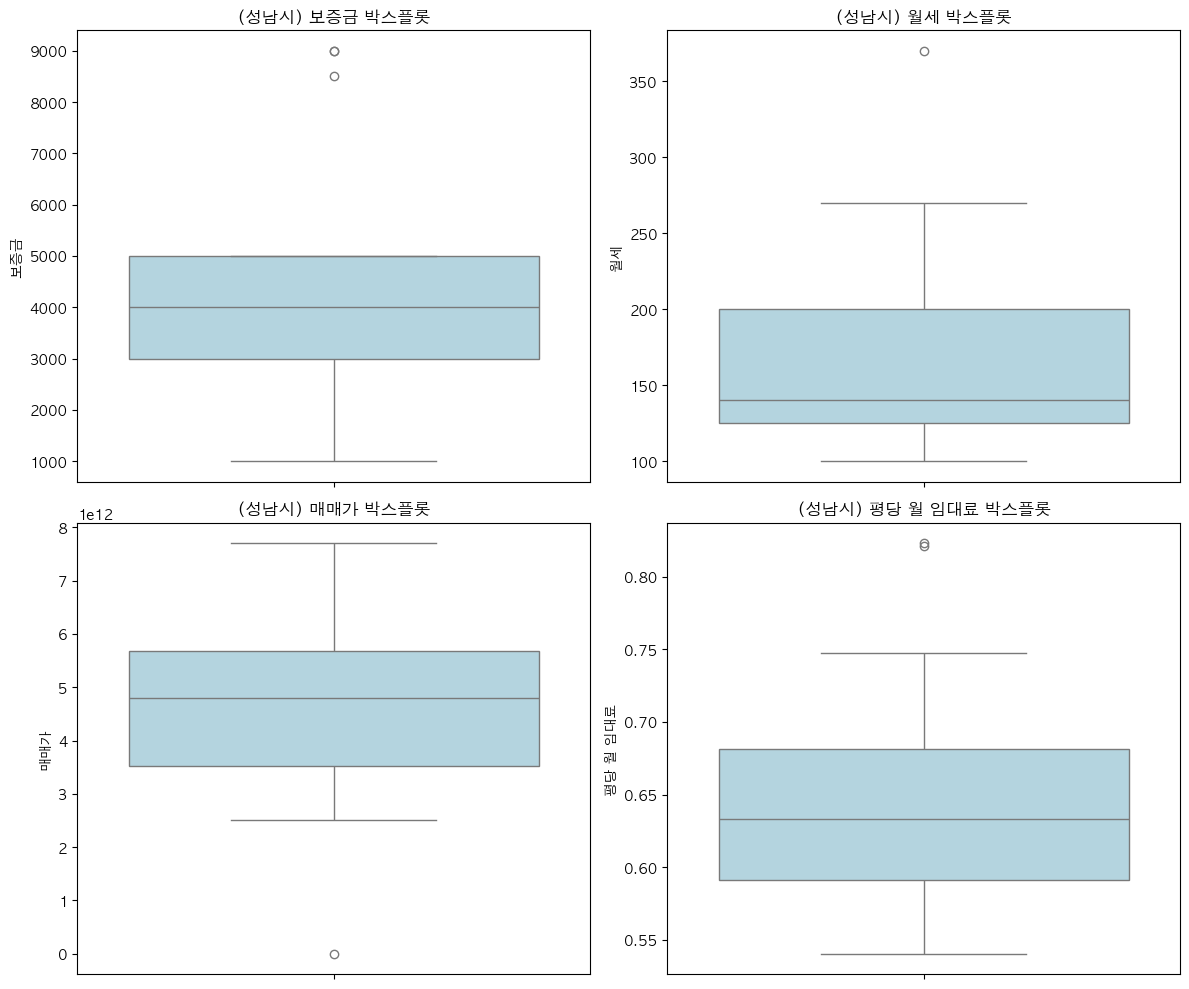

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, col in enumerate(price_cols):
    sns.boxplot(y=성남시_df[col], ax=axes[idx], color='lightblue')
    axes[idx].set_title(f"(성남시) {col} 박스플롯")

plt.tight_layout()
plt.show()


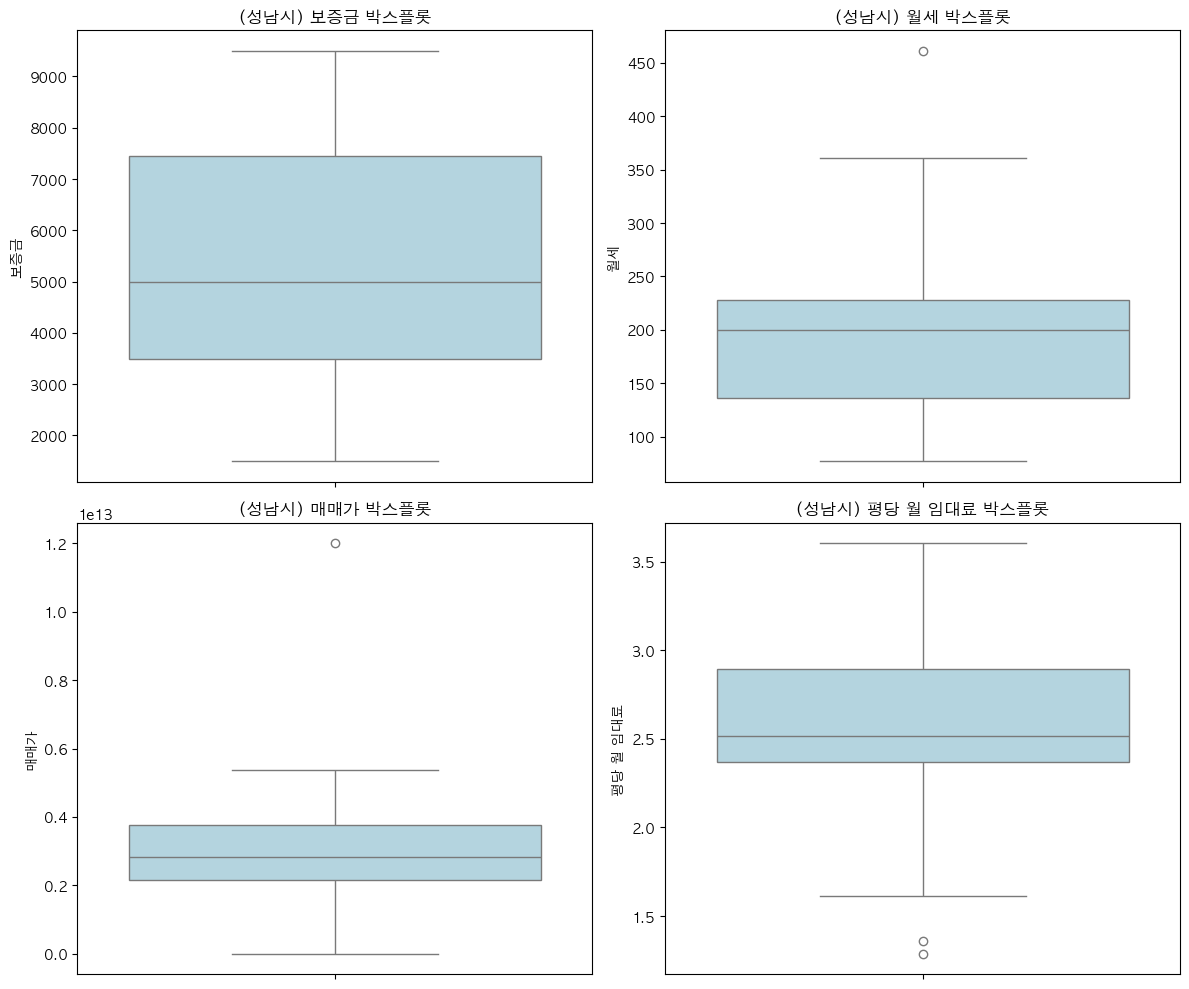

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, col in enumerate(price_cols):
    sns.boxplot(y=군포_의왕_df[col], ax=axes[idx], color='lightblue')
    axes[idx].set_title(f"(성남시) {col} 박스플롯")

plt.tight_layout()
plt.show()


### 상관분석: 가격 vs. 공실률

In [19]:
cols_for_corr = price_cols + ['공실률']

print("[성남시] 가격 & 공실률 상관계수")
corr_sn = 성남시_df[cols_for_corr].corr()
display(corr_sn)

print("[군포·의왕시] 가격 & 공실률 상관계수")
corr_go = 군포_의왕_df[cols_for_corr].corr()
display(corr_go)


[성남시] 가격 & 공실률 상관계수


,보증금,월세,매매가,평당 월 임대료,공실률
보증금,1.000000,0.327356,0.674347,-0.103319,-0.053624
월세,0.327356,1.000000,0.559667,-0.307655,-0.213273
매매가,0.674347,0.559667,1.000000,0.204803,-0.372171
평당 월 임대료,-0.103319,-0.307655,0.204803,1.000000,0.224805
공실률,-0.053624,-0.213273,-0.372171,0.224805,1.000000


[군포·의왕시] 가격 & 공실률 상관계수


,보증금,월세,매매가,평당 월 임대료,공실률
보증금,1.000000,0.498017,0.037169,0.465057,-0.170297
월세,0.498017,1.000000,0.494222,0.184797,0.098752
매매가,0.037169,0.494222,1.000000,0.244614,0.126906
평당 월 임대료,0.465057,0.184797,0.244614,1.000000,0.355439
공실률,-0.170297,0.098752,0.126906,0.355439,1.000000


#### 성남시
공실률 ~ 매매가(상관계수 -0.372)

중간 정도의 음의 상관: “매매가가 높은 센터일수록 공실률이 낮은 경향”을 시사합니다.
즉, ‘비싸게 거래되는(가치가 높은) 건물’일수록 기업들의 입주 선호도가 높아서 공실이 적을 수 있다는 해석이 가능합니다.
공실률 ~ 평당 월 임대료(상관계수 +0.225)

약한 양의 상관: “평당 임대료가 높아지면 어느 정도 공실률도 올라가는 경향”이 있음을 의미합니다.
일반적으로 임대료가 비싸면 입주가 어려워 공실이 생길 수 있다는 논리와 일치하지만, 절대값 자체가 크지는 않으므로 “아주 강한 관계”라고 보기는 어렵습니다.
공실률 ~ 월세(상관계수 -0.213)

약한 음의 상관: “월세가 비쌀수록 오히려 공실률이 낮아진다”는, 다소 상반된 방향의 결과가 나타났습니다.
이는 샘플 수가 적거나, ‘월세’와 ‘평당 월 임대료’가 서로 다른 방식으로 책정되고 있을 수 있기 때문입니다(예: 호실 면적이 작아도 평당 임대료는 높을 수 있음).
또한, 고급·브랜드 센터일수록 월세가 높지만 오히려 공실이 적게 나타날 수도 있습니다.
보증금 ~ 공실률(상관계수 -0.054)

거의 0에 가까워, 별다른 선형관계가 없다고 볼 수 있습니다.
매매가 ~ 보증금·월세 (상관계수 각각 0.674, 0.560)

매매가가 높은 건물일수록 보증금·월세도 높아지는 것은 자연스러운 현상(자산 가치, 입지 프리미엄 등).
- 요약
“매매가가 높은(가치가 높은) 건물 → 공실률 낮음”이라는 흐름이 눈에 띕니다.
“평당 월 임대료”가 높으면 공실률이 약간 올라가는 경향이 있으나, 전체적으로는 그 영향력이 크지는 않습니다.
따라서 성남시의 공실률은 단순 임대료 수준보다는 건물 가치(매매가), 입지 및 기타 요인으로 더 많이 설명될 가능성이 큽니다.

#### 군포의왕시
```
공실률 ~ 평당 월 임대료(상관계수 +0.355)

군포·의왕시에서는 “평당 월 임대료가 높을수록 공실률도 다소 높아지는 경향”이 약간 더 두드러집니다(상관계수가 성남시보다 큼).
즉, 임대료가 비싼 센터가 일부 공실을 더 겪고 있을 가능성이 있습니다.
공실률 ~ 월세(상관계수 +0.099), 공실률 ~ 보증금(상관계수 -0.17)

둘 다 상관계수가 매우 낮거나 약함.
보증금이 높아도/낮아도 공실률과 큰 관련은 없어 보이고, 월세도 비슷하게 거의 상관이 없습니다.
공실률 ~ 매매가(상관계수 +0.127)

사실상 무시해도 될 정도의 낮은 상관. “매매가가 높다고 해서 공실률이 낮지도, 높지도 않다”는 뜻입니다.
보증금 ~ 월세(상관계수 +0.498)

보증금이 높으면 월세도 높은 경향이 어느 정도는 나타나고 있습니다(중간 정도의 상관). 일반적으로 자산 가치·임대 정책에서 일관성이 있음을 시사.
```
- 요약 (군포·의왕시)
```
전반적으로 “가격 지표와 공실률”의 직선적 관계는 크지 않지만, 그나마 ‘평당 월 임대료’가 높으면 공실률이 조금 올라간다는 경향이 보입니다(+0.355).
보증금, 월세, 매매가 등은 공실률과 거의 무관에 가깝거나 약한 상관만 보임 → 가격보다 다른 입지·시설·정책 요인이 더 크다고 해석할 여지가 있음.
```



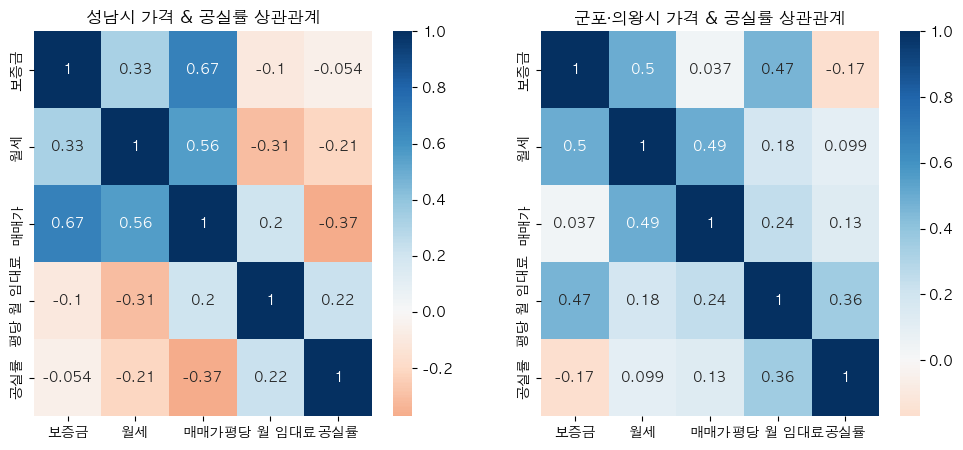

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(corr_sn, annot=True, cmap='RdBu', center=0, ax=ax1)
ax1.set_title("성남시 가격 & 공실률 상관관계")

sns.heatmap(corr_go, annot=True, cmap='RdBu', center=0, ax=ax2)
ax2.set_title("군포·의왕시 가격 & 공실률 상관관계")

plt.show()


### 가격 지표 VS 공실률 산점도 및 지역비교

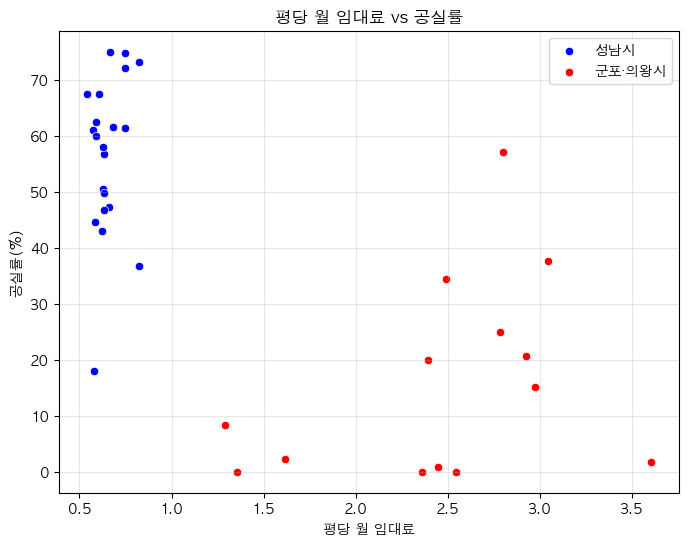

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='평당 월 임대료', y='공실률', data=성남시_df, color='blue', label='성남시')
sns.scatterplot(x='평당 월 임대료', y='공실률', data=군포_의왕_df, color='red', label='군포·의왕시')
plt.title("평당 월 임대료 vs 공실률")
plt.xlabel("평당 월 임대료")
plt.ylabel("공실률(%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


##### 성남시의 공실률이 높은 이유는 임대료 때문이 아닐 가능성이 높음.
보통 “임대료가 비싸면 공실이 많아질 것”이라고 생각하기 쉬운데, 성남시는 평당 월 임대료가 낮아도 공실률이 높음.
이는 입지, 교통 접근성, 센터의 시설 문제, 특정 업종 제한, 최근 신축 공급 과잉 등 다른 요인이 더 크게 작용하고 있을 가능성을 의미함.
##### 평당 월 임대료가 0.5~1.0 구간에 몰려 있음 → 가격 경쟁력이 높지 않을 수도 있음.
일반적으로 평당 월 임대료가 낮으면 경쟁력이 높아 공실률이 낮아야 하지만, 성남시에서는 그 공식이 적용되지 않음.
즉, 저렴한 임대료로도 입주자를 유치하지 못하고 있다는 점이 문제일 수 있음.
##### 신규 공급 과잉 가능성

신축된 지식산업센터가 많거나, 해당 지역 내 센터가 너무 많아 공급이 수요보다 과도한 상태일 가능성도 있음.

- ✅ 성남시는 임대료가 낮아도 공실률이 매우 높음 → 가격이 아니라 다른 요인(입지, 공급 과잉 등)이 문제일 가능성이 큼.
- ✅ 군포·의왕시는 평당 월 임대료가 높지만 공실률이 낮음 → 기업 수요가 많고, 산업·교통 인프라가 잘 갖춰진 지역일 가능성이 큼.
- ✅ 단순히 성남시의 임대료를 더 낮춘다고 해서 공실률이 해결되지 않을 수 있으며, 입지 개선, 기업 유치 정책이 더 중요한 해결책일 가능성이 높음.
- ✅ 과잉공급이 있는 곳이 성남시일수도 있음


### 랜덤포레스트 확인해보자

In [23]:
from sklearn.ensemble import RandomForestRegressor

features = ['월세', '보증금', '매매가', '전용면적(평)', '건축연도']
X_sn = 성남시_df[features]
y_sn = 성남시_df['공실률']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_sn, y_sn)

# 변수 중요도 확인
importances = rf.feature_importances_
for name, imp in zip(features, importances):
    print(f"{name}: {imp:.3f}")


월세: 0.077
보증금: 0.121
매매가: 0.235
전용면적(평): 0.313
건축연도: 0.253


- 성남시 인사이트
```
성남시는 ‘전용면적(평)’과 ‘건축연도’가 공실률에 가장 중요한 변수
즉, 넓은 면적의 센터일수록 공실이 많고, 최근에 지어진 건물일수록 공실률이 높을 가능성
매매가가 높은 센터는 공실률이 낮아지는 경향 → 기업들이 비싼 건물에는 선호도가 높음.
월세는 공실률에 큰 영향을 주지 않음. 즉, 가격보다 건물 자체의 특성이 더 중요
```


In [24]:
from sklearn.ensemble import RandomForestRegressor

features = ['월세', '보증금', '매매가', '전용면적(평)', '건축연도']
X_sn = 군포_의왕_df[features]
y_sn = 군포_의왕_df['공실률']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_sn, y_sn)

# 변수 중요도 확인
importances = rf.feature_importances_
for name, imp in zip(features, importances):
    print(f"{name}: {imp:.3f}")


월세: 0.408
보증금: 0.095
매매가: 0.181
전용면적(평): 0.100
건축연도: 0.216


📌 군포·의왕시의 핵심 인사이트
```
월세(0.408)가 공실률에 가장 중요한 변수 → 즉, 월세가 너무 비싸면 공실률이 올라가는 경향
건축연도도 중요한 요소이지만, 성남시보다는 덜 중요한 편
매매가도 공실률에 영향을 주지만, 성남시보다는 상대적으로 중요도가 낮음
전용면적(평)과 보증금은 공실률에 미치는 영향이 미미함
```

결론
```
성남시는 전용면적(평)이 클수록 공실률이 변하는 경향이 크다.

즉, 큰 면적을 가진 센터일수록 공실이 많거나 적을 가능성이 있음.
추가적으로, 건축연도도 중요한 변수 → 신축일수록 공실률이 높을 가능성이 있음.
성남시는 가격보다 건물 크기(전용면적)와 신축 여부(건축연도)가 공실률을 좌우하는 지역
군포·의왕시는 월세가 공실률에 가장 중요한 변수이다.

월세가 높아질수록 공실률이 증가할 가능성이 크다.
즉, 임대료가 너무 높은 곳이 군포·의왕시에서 공실률을 높이는 핵심 원인
보증금은 두 지역 모두 공실률과 큰 관계가 없다.

기업들은 보증금이 높다고 해서 크게 영향을 받지 않는 것으로 보임.
```

🔹 성남시 해결책
```
공실 문제 해결을 위해 가격 조정보다는 "대형 센터 활성화"와 "신축 센터의 입주 지원"이 더 효과적일 가능성
전용면적이 크면 공실률이 높아지는지 추가 분석 필요 → 만약 그렇다면, 대형 센터는 소형화하여 운영하거나 스타트업 맞춤 임대 모델을 고려 가능
신축 센터 공실률이 높다면 초기 기업 유치를 위한 인센티브(임대료 지원, 세금 감면) 필요
```
🔹 군포·의왕시 해결책
```
공실 문제 해결을 위해 "월세 조정"이 효과적일 가능성
월세가 너무 높은 건물의 경우, 적절한 가격 조정이 공실률 감소에 기여할 가능성이 큼
즉, 성남시는 "건물 자체의 문제(면적·연식)"가 핵심이라면, 군포·의왕시는 "임대료 수준"이 문제일 가능성이 큼
```


# 성남시와 군포·의왕시 지식산업센터 공실률 비교 분석 및 전략 도출

## 1. 서론
### ✅ 분석 배경 및 목적
지식산업센터는 기업 활동을 지원하는 핵심 인프라로 자리 잡고 있으나, 지역별로 공실률 차이가 크다. 본 연구는 **성남시의 공실률이 높은 이유와 군포·의왕시의 공실률이 낮은 이유를 비교 분석**하여, 성남시처럼 공실률이 높은 지역에서 공실률을 낮출 수 있는 전략을 도출하고자 한다. 이를 통해 3기 신도시 개발 시, 공실률을 최소화할 수 있는 인사이트를 제공하고, 입지 선정에 대한 전략적 방향을 제시하는 것을 목표로 한다.

## 2. 공실률 비교 분석
### ✅ 성남시와 군포·의왕시의 공실률 차이
- **성남시**: 평균 공실률 **56.55%** (최소 18.07%, 최대 75%)
- **군포·의왕시**: 평균 공실률 **18.00%** (최소 0%, 최대 64.7%)
- **분석 결과**: 성남시는 평균 공실률이 50% 이상으로 높은 반면, 군포·의왕시는 일부 센터를 제외하면 대체로 낮은 공실률을 유지하고 있음.

## 3. 원인 분석
### ✅ 공급면적 및 전용면적
- 군포·의왕시는 공급면적이 **평균 144평**으로 성남시보다 크며, **500평 이상 초대형 센터도 포함**됨.
- 성남시는 공급면적이 **100평 안팎**으로 주로 중소형 규모가 많음.
- **결론**: 군포·의왕시는 **대형·초대형 센터**도 포함되면서 다양한 기업 수요를 충족한 반면, 성남시는 **소형·중형 위주 공급이 많아 수요 미스매치가 발생할 가능성**.

### ✅ 연면적(㎡)
- 성남시: **평균 93.8만 ㎡**, 최대 291만 ㎡
- 군포·의왕시: **평균 59.5만 ㎡**, 최대 461만 ㎡
- **해석**: 군포·의왕시는 일부 초대형 센터(최대 461만 ㎡)가 존재하여, **기업들의 집적 효과 및 산업 클러스터 형성이 이루어질 가능성**.

### ✅ 임대료 및 매매가 비교
- **성남시**: 평당 월 임대료 **0.65** / 평균 매매가 **4.66억 원**
- **군포·의왕시**: 평당 월 임대료 **2.47** / 평균 매매가 **3.33억 원**
- **해석**: 군포·의왕시는 높은 임대료에도 불구하고 공실률이 낮음 → **입지적 강점, 산업 클러스터 형성, 정책적 지원 등 비가격적 요인 영향**.
- 반면 성남시는 낮은 임대료에도 공실률이 높음 → **단순 가격 문제가 아니라, 공급 과잉, 입지적 문제, 기업 수요 부족 등의 복합적 원인**.

### ✅ 건축연도 비교 및 공실률 상관관계
- 성남시: 신축일수록 공실률 높음 (양의 상관관계 **0.623**)
- 군포·의왕시: 건축연도와 공실률의 명확한 상관관계 없음.
- **결론**: 성남시는 **신축 센터가 많은데도 공실률이 높은 현상**이 확인됨 → 공급 과잉, 임대료 대비 시설 경쟁력 부족 가능성.

## 4. 성남시 공실률 저감 전략
### ✅ 핵심 원인 도출
1. **공급 과잉 가능성**: 성남시는 최근 지어진 센터들이 많으며, 해당 센터들이 임대가 충분히 이루어지지 않은 상태일 가능성이 큼.
2. **대형 센터 부족**: 군포·의왕시처럼 초대형 센터가 많지 않고, 중소형 위주의 공급이 많아 기업 수요와의 미스매치 발생 가능성.
3. **입지 경쟁력 부족**: 군포·의왕시는 고속도로 및 산업단지 접근성이 뛰어난 반면, 성남시는 상대적으로 입지적 장점이 약할 가능성이 있음.
4. **정책적 지원 필요**: 군포·의왕시는 기업 친화적 정책이 마련되어 있을 가능성이 있으며, 성남시는 이에 비해 정책적 지원이 부족할 수 있음.

### ✅ 해결책
1. **초기 기업 유치 인센티브 제공**
   - 신축 센터에 대한 세금 감면, 임대료 보조금 제공.
   - 스타트업 및 중소기업 맞춤형 지원 정책 시행.
2. **대형 센터 공급 활성화**
   - 기존 중소형 센터의 활용도를 높이기 위해 일부 공간을 공유 오피스 형태로 운영.
   - 군포·의왕시처럼 대형 센터를 유치하여 기업들의 집적 효과 유도.
3. **산업 클러스터 연계 강화**
   - IT, 제조업 등 특정 산업군과 연계한 기업 유치 정책 마련.
   - 교통 인프라 개선 및 기업 지원 시설 확대.
4. **공급 조절 및 차별화된 임대 정책 도입**
   - 단순 가격 인하보다, 맞춤형 임대 옵션 제공(예: 장기 계약 시 할인, 초기 1년 임대료 감면 등).
   - 공실률이 높은 센터는 용도 변경 또는 기업 맞춤형 리모델링 검토.

## 5. 결론
✅ **성남시는 공실률이 높은 이유가 단순히 임대료 때문이 아니라, 공급 과잉과 기업 수요 부족 등의 복합적 문제 때문임이 확인됨.**  
✅ **군포·의왕시는 높은 임대료에도 불구하고 공실률이 낮으며, 산업 클러스터, 대형 센터, 입지적 장점 등의 비가격 요인이 중요한 역할을 하고 있음.**  
✅ **성남시는 단순히 임대료를 낮추는 것보다, 대형 센터 활성화, 초기 기업 유치 인센티브, 산업 클러스터 연계, 공급 조절 등 종합적인 전략을 통해 공실률을 낮출 필요가 있음.**


